## Flights Data Exploration Challenge

base de datos CSV de vuelos de EU en 2013

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_flights = pd.read_csv('flights.csv')#importamos el CSV como df_flights

df_flights.info() # comando para visualizas columnas
 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

## Indice de columnas

- Year: The year of the flight (all records are from 2013)  
- Month: The month of the flight  
- DayofMonth: The day of the month on which the flight departed  
- DayOfWeek: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)  
- Carrier: The two-letter abbreviation for the airline.  
- OriginAirportID: A unique numeric identifier for the departure aiport  
- OriginAirportName: The full name of the departure airport  
- OriginCity: The departure airport city  
- OriginState: The departure airport state  
- DestAirportID: A unique numeric identifier for the destination aiport  
- DestAirportName: The full name of the destination airport  
- DestCity: The destination airport city  
- DestState: The destination airport state  
- CRSDepTime: The scheduled departure time  
- DepDelay: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)  
- DelDelay15: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")  
- CRSArrTime: The scheduled arrival time  
- ArrDelay: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)  
- ArrDelay15: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")  
- Cancelled: A binary indicator that the flight was cancelled  

## objetivo: identificar posibles factores ue afecten la llegada o salida de los vuelos

### - 1 limpieza de datos
    identificar datos nulos o faltantes y reemplazar por algo adecuado
    existen valores atípicos en **ArrDelay** y **DepDelay
    
- ArrDelay: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)  
- DepDelay: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)  

In [ ]:
#print(df_flights.to_string())
#pd.set_option('display.max_rows', None) #muestra todo 

df_flights

## Datos atípicos
nuestro ejercicio deja en claro que se considera un dato atípico los valores negativos en **ArrDelay**, filtraremos los datos atípicos para visualizarlos

In [3]:
ArrDelay_negativos = df_flights[df_flights['ArrDelay']<0]
ArrDelay_negativos


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
8,2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1010,8,0.0,1240,-10,0,0
10,2013,6,9,7,OO,12892,Los Angeles International,Los Angeles,CA,14679,San Diego International,San Diego,CA,1404,3,0.0,1507,-8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271929,2013,9,9,1,DL,14869,Salt Lake City International,Salt Lake City,UT,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,1655,0,0.0,2232,-6,0,0
271931,2013,7,5,5,WN,15304,Tampa International,Tampa,FL,10529,Bradley International,Hartford,CT,1100,2,0.0,1350,-10,0,0
271933,2013,10,29,2,US,13930,Chicago O'Hare International,Chicago,IL,14100,Philadelphia International,Philadelphia,PA,1345,-6,0.0,1645,-11,0,0
271934,2013,4,13,6,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,13204,Orlando International,Orlando,FL,1335,-7,0.0,1705,-12,0,0


nuestros dátos atípicos son bastantes:  
152126 filas con datos atípicos en **ArrDelay**   
contra 271940 del total del dataframe, cercano a la mitad


In [4]:
DepDelay_negativos = df_flights[df_flights['DepDelay']<0]
DepDelay_negativos

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
14,2013,10,20,7,AS,14107,Phoenix Sky Harbor International,Phoenix,AZ,14747,Seattle/Tacoma International,Seattle,WA,1330,-11,0.0,1628,-15,0,0
15,2013,4,14,7,AA,12892,Los Angeles International,Los Angeles,CA,13830,Kahului Airport,Kahului,HI,1730,-7,0.0,2010,26,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271928,2013,4,14,7,WN,13495,Louis Armstrong New Orleans International,New Orleans,LA,11259,Dallas Love Field,Dallas,TX,1905,-1,0.0,2035,-6,0,0
271932,2013,8,26,1,WN,11292,Denver International,Denver,CO,12191,William P Hobby,Houston,TX,1855,-2,0.0,2215,0,0,0
271933,2013,10,29,2,US,13930,Chicago O'Hare International,Chicago,IL,14100,Philadelphia International,Philadelphia,PA,1345,-6,0.0,1645,-11,0,0
271934,2013,4,13,6,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,13204,Orlando International,Orlando,FL,1335,-7,0.0,1705,-12,0,0


para **DepDelay** también es una cantidad similar

para poder analizar los datos tenemos que trabajar esos datos atípicos 
existen varios métodos para tratar con ellos  

- quitarlos del dataframe
- reemplazarlos con la media
- Winzorisación (remplazo con los valores no atípicos mas cercanos, en este caso 0)

recortar los datos no es conveniente, ya que perdemos casi la mitad del dataframe 

reemplazando con la media conservamos los datos, pero marcaríamos como tardios los vuelos cuando no fueron así

la Winsorización parece mas acertada, eliminamos elementos negativos y conservamos los vuelos que llegaron a tiempo con un valor de 0

antes de tratar los datos contabilizamos si existen valores nulos en cualquier otra columna:

In [5]:
null_values = df_flights.isnull().sum()
null_values

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

son muy pocos como para afectar el dataframe, podemos recortarlos

In [6]:
df_not_null_values = df_flights.dropna()
df_not_null_values.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

### ahora podemos aplicar la Winsorisacion 

In [7]:
#df_flights ['ArrDelay'] < 0
df_flights['ArrDelay'] = df_flights['ArrDelay'].where(df_flights['ArrDelay'] >= 0, 0) 
# checamos valores negativos en ArrDelay
ArrDelay_negativos = df_flights[df_flights['ArrDelay']<0]
ArrDelay_negativos
#ninguno
#sustituimos DepDelay
df_flights['DepDelay'] = df_flights['DepDelay'].where(df_flights['DepDelay'] >= 0, 0) 
#checamos DepDelay negativos
DepDelay_negativos = df_flights[df_flights['DepDelay']<0]
DepDelay_negativos

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled


### Según el ejercicio ahora podemos trabajar con los datos 

In [8]:
#limpiar valores nulos antes de 

df_flights = df_flights.dropna()

df_flights.info()
null_values = df_flights.isnull().sum()
null_values

<class 'pandas.core.frame.DataFrame'>
Index: 269179 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               269179 non-null  int64  
 1   Month              269179 non-null  int64  
 2   DayofMonth         269179 non-null  int64  
 3   DayOfWeek          269179 non-null  int64  
 4   Carrier            269179 non-null  object 
 5   OriginAirportID    269179 non-null  int64  
 6   OriginAirportName  269179 non-null  object 
 7   OriginCity         269179 non-null  object 
 8   OriginState        269179 non-null  object 
 9   DestAirportID      269179 non-null  int64  
 10  DestAirportName    269179 non-null  object 
 11  DestCity           269179 non-null  object 
 12  DestState          269179 non-null  object 
 13  CRSDepTime         269179 non-null  int64  
 14  DepDelay           269179 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CRSArrT

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

## datos listos para trabajar

## ¿que es lo que usualmete causa el retraso de un vuelo?
- condiciones metorológicas
- aerolinea (procesos logísticos, carga de equipaje, problemas mecánicos)
- exceso de tráfico de aviones
- motivos de seguridad
  
estos motivos pueden ser asociados a causas de origen

- condiciones metorológicas (localización del aeropuerto)
- aerolinea (procesos logísticos, carga de equipaje, problemas mecánicos) (aerolinea)
- exceso de tráfico de aviones (localización del aeropuerto)
- motivos de seguridad (irregularidades)

#### los dos factores que mas conviene estudiar son localización del aereopuerto y aerolínea

analicemos las llegadas y salidas retrasadas segun aeropuerto y aerolinea

In [9]:
df_flights_sorted = df_flights.sort_values(by='ArrDelay')
df_flights_sorted

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
135921,2013,8,20,2,DL,13930,Chicago O'Hare International,Chicago,IL,13487,Minneapolis-St Paul International,Minneapolis,MN,1925,0,0.0,2054,0,0,0
234170,2013,10,15,2,WN,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13204,Orlando International,Orlando,FL,1140,0,0.0,1305,0,0,0
131072,2013,4,27,6,UA,13930,Chicago O'Hare International,Chicago,IL,11292,Denver International,Denver,CO,1218,0,0.0,1405,0,0,0
234166,2013,7,7,7,DL,15304,Tampa International,Tampa,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,525,0,0.0,648,0,0,0
131074,2013,5,11,6,MQ,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,815,0,0.0,1025,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32883,2013,4,1,1,AA,13871,Eppley Airfield,Omaha,NE,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,840,1320,1.0,1045,1301,1,0
255631,2013,6,17,1,AA,14771,San Francisco International,San Francisco,CA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,905,1366,1.0,1435,1348,1,0
251813,2013,7,2,2,AA,12889,McCarran International,Las Vegas,NV,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,805,1386,1.0,1250,1394,1,0
180503,2013,4,3,3,AA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13303,Miami International,Miami,FL,755,1425,1.0,950,1429,1,0


gráfico de ejemplo que muestra los delays de llegada según aeropuerto y retraso por minutos

Text(0.5, 1.0, 'delay en funcion de aeropuerto de origen')

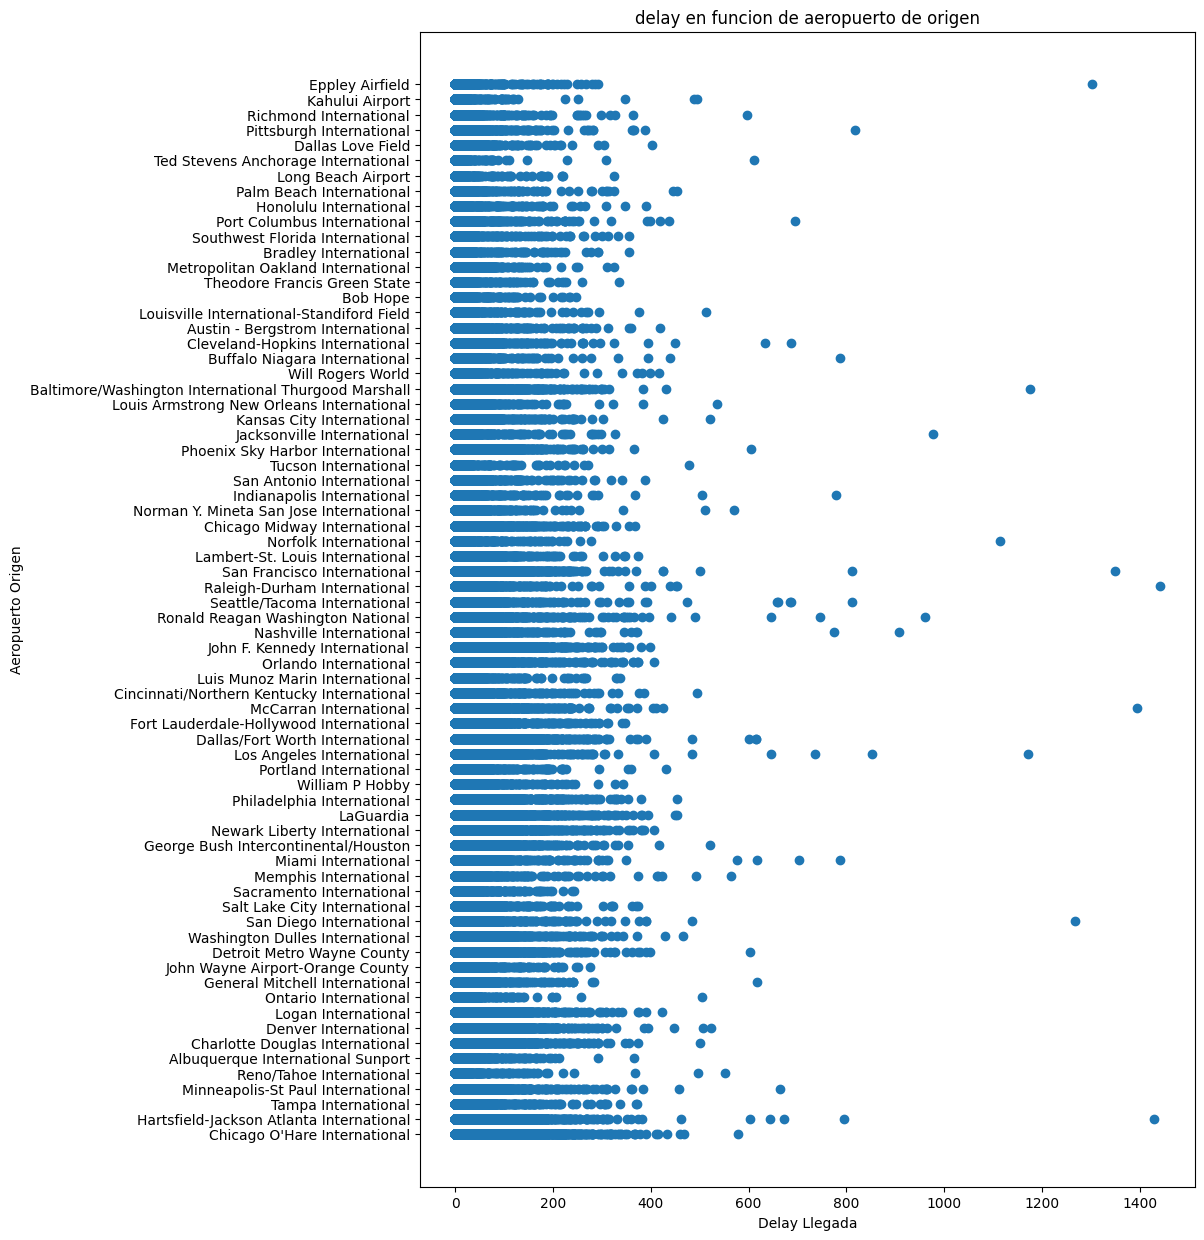

In [20]:
plt.figure(figsize=(10, 15))
plt.scatter(df_flights_sorted ['ArrDelay'], df_flights_sorted['OriginAirportName'], marker='o')
plt.xlabel('Delay Llegada')
plt.ylabel('Aeropuerto Origen')
plt.title('delay en funcion de aeropuerto de origen')

contando la cantidad de vuelos con delay segun aeropuerto

In [ ]:
count_ArrDelay_airport = df_flights_sorted['Arrdelays'].str.contains('hola').sum()